This assignment is suggested to complete on Google colab  (https://colab.research.google.com/) to benefit from its GPU support. 

In [54]:
# importing common libraries
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#### **Part 1: Linear SVM Classifier**

 Binary classification on given dataset

In [55]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

data = datasets.load_wine()

# store instances with second and third attibutes as x
X = data.data
X=X[:,1:3]
# store labels as y
y = data.target
# get a subset of data for binary clasification (with all instances from class 0 and class 1, not from class 2) 
index = np.where(y == 2)
y = np.delete(y, index, 0)
X = np.delete(X, index, 0)
#split your dataset in train (%70) and test-set (%30)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3) 

In [56]:
print(len(x_train),' samples in training data\n',
      len(x_test),' samples in test data\n', )

91  samples in training data
 39  samples in test data



In [57]:
from sklearn import svm
from sklearn.svm import SVC
# classify with SVM Linear Classifier model 
classification1=svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
max_iter=-1, probability=False, random_state=None, shrinking=True,
tol=0.001, verbose=False) 
classification1.fit(x_train,y_train)

#y_predict = classification1.predict(x_test)
#print(y_predict)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
classification1.coef_[0]


array([-0.01204871, -1.87573585])

In [59]:
def plot_svm_decision_boundary(classifier, xmin, xmax):
    # get function coefficients from the classifier
    w = classifier.coef_[0]
    # generate x0 wrt to range of xmin and xmax 
    a = -w[0] / w[1]
    xx = np.linspace(xmin, xmax)
    # from wx+b =0, w0x0+w1x1+b=0 -> x1=-((w0/w1)x0 + b/w1)
    # compute decision boundary, that is x1    
    yy = a * xx - (classifier.intercept_[0]) / w[1]
    # compute margin  
    # compute support vectors     
    b = classifier.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = classifier.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])
    # plot support vectors
    plt.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1],
            s=80, facecolors='none')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    # plot also decision boundary and margins 
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.axis('tight')
    
    plt.show()

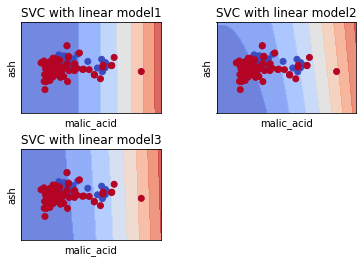

In [60]:
# generate 3 linear models (ax+b),with random a, b parameters

# dont we have 2 attribute, so 2 dim linear function??

h = .02  
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

model1 = ((xx.ravel()**2)*np.random.rand(1))+(yy.ravel()*np.random.rand(1))+np.random.rand(1)
model2 = ((xx.ravel()**2)*np.random.rand(1))+(yy.ravel()*np.random.rand(1))+np.random.rand(1)
model3 = ((xx.ravel()**2)*np.random.rand(1))+(yy.ravel()*np.random.rand(1))+np.random.rand(1)

titles = ['SVC with linear model1',
          'SVC with linear model2',
          'SVC with linear model3']
for i, clf in enumerate((model1, model2, model3)):    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)  
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('malic_acid')
    plt.ylabel('ash')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()


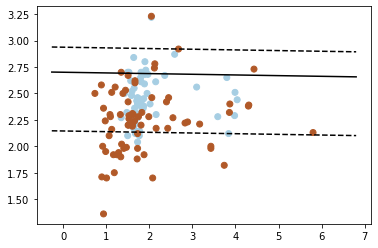

In [61]:
# call plot_svm_decision_boundary function for plotting decision boundary margings and suopprt vectors
x_min, x_max = X[:, :].min()-1, X[:, :].max()+1
plot_svm_decision_boundary(classification1, x_min, x_max)


#plot also 2d data point for each class with different colored markers


Classify with Linear SVM on scaled and  also unscaled data, compare their decision boundaries using your plot_svm_decision_boundary function

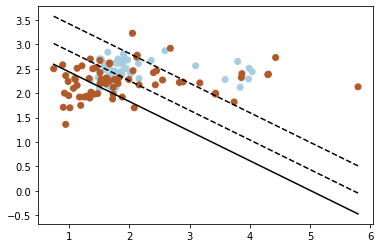

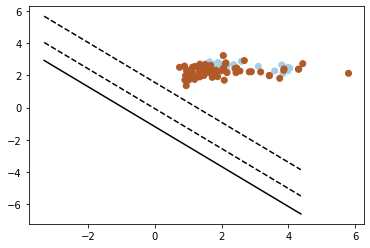

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# svm classfier on unscaled data
# plot data points and decision boundaries
# to-do
Xu_train, Xu_test, yu_train, yu_test = train_test_split(X, y,shuffle=False)
 
unscaled=svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
max_iter=-1, probability=False, random_state=None, shrinking=True,
tol=0.001, verbose=False) 
unscaled.fit(Xu_train,yu_train)

xu_min, xu_max = X[:, :].min(), X[:, :].max()
plot_svm_decision_boundary(unscaled, xu_min, xu_max)

# svm classfier on scaled data
# plot data points and decision boundaries
# to-do
Xs = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y,shuffle=False)
 
scaled=svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
max_iter=-1, probability=False, random_state=None, shrinking=True,
tol=0.001, verbose=False) 
scaled.fit(X_train,y_train)

x_min, x_max = Xs[:, :].min(), Xs[:, :].max()
plot_svm_decision_boundary(scaled, x_min, x_max)

In [63]:
# get a test score using unscaled SVM classifier
score = unscaled.score(Xu_test, yu_test)
print (score)

0.2727272727272727


Add 2 outliers, and analyze their effects on SVM classifier by comparing previous decision boundary.
Annotate thse outliers on your plots.

In [64]:
X[:,0].mean(),X[:,1].mean(),y.mean()

(1.968076923076923, 2.3404615384615384, 0.5461538461538461)

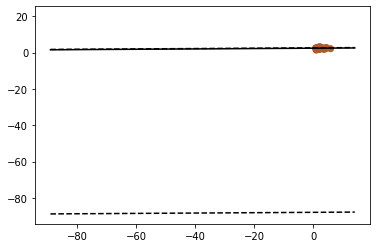

In [65]:
# add outliers to your data
# outliers_x= [10,20],[-5,-88]
# outliers_y= [5], [13]
outlierX = np.append(X, np.array([[10,20]]), axis=0)
outlierX = np.append(outlierX, np.array([[-5,-88]]), axis=0)
outliery = np.append(y, np.array([5]), axis=0)
outliery = np.append(outliery, np.array([13]), axis=0)
x_train, x_test, y_train, y_test = train_test_split(outlierX,outliery) 
classify=svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
max_iter=-1, probability=False, random_state=None, shrinking=True,
tol=0.001, verbose=False) 

#y_predict = classification1.predict(x_test)

# classify with SVM linear classifier
# to-do
classify.fit(x_train,y_train)

# plot data (show also outliers and decision boundaries)  
# to-do
x_min, x_max = outlierX[:, :].min()-1, outliery.max()+1
plot_svm_decision_boundary(classify, x_min, x_max)

 #### **Part 2: NonLinear SVM**

Compare Linear and Kernel Multi-class SVMs

In [66]:
# get wine data instances for each class with same attributes (1 and 2)
X = data.data
X=X[:,1:3]
y = data.target
# split your new dataset as training and test set
# to-do
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3) 

# define Linear, RBF, Polynomial and Sigmoid) with following parameters: Regularizer=1, polynomail degree= at least 3, gaussian gamma=1
Linear = svm.SVC(C=1, degree=3, gamma=1, kernel='linear') 
RBF = svm.SVC(C=1, degree=3, gamma=1)
Polynomial = svm.SVC(C=1, degree=3, gamma=1,kernel='poly')
Sigmoid = svm.SVC(C=1, degree=3, gamma=1,kernel='sigmoid')

# for multi-class SVM use one-versus-one approach
# to-do
from sklearn.multiclass import OneVsOneClassifier
ovoL = OneVsOneClassifier(Linear)
ovoRBF = OneVsOneClassifier(RBF)
ovoP = OneVsOneClassifier(Polynomial)
ovoS = OneVsOneClassifier(Sigmoid)
# fit model
ovoL.fit(x_train, y_train)
ovoRBF.fit(x_train, y_train)
ovoP.fit(x_train, y_train)
ovoS.fit(x_train, y_train)



OneVsOneClassifier(estimator=SVC(C=1, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma=1, kernel='sigmoid', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   n_jobs=None)

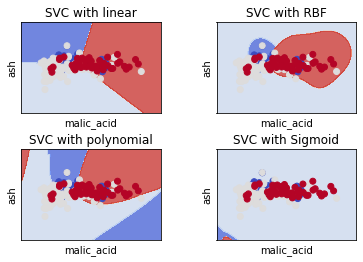

In [67]:
# plot each SVM classifiers decision boundaries (use subpplots)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear',
          'SVC with RBF',
          'SVC with polynomial',
          'SVC with Sigmoid']


for i, clf in enumerate((ovoL, ovoRBF, ovoP, ovoS)):
    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    # add the titles for each plots
    plt.xlabel('malic_acid')
    plt.ylabel('ash')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()
# to-do

In [69]:
from sklearn.metrics import accuracy_score
#compare prediction results of each classifier based on accuries (print them)
# to-do

for i, clf in enumerate((ovoL, ovoRBF, ovoP, ovoS)):       
  Z = clf.predict(x_test)  
  print(titles[i],":",accuracy_score(y_test, Z))  
    

SVC with linear : 0.5925925925925926
SVC with RBF : 0.7407407407407407
SVC with polynomial : 0.7407407407407407
SVC with Sigmoid : 0.35185185185185186


In [70]:
from sklearn.metrics import confusion_matrix
#compare confusion matrices
#to-do
for i, clf in enumerate((ovoL, ovoRBF, ovoP, ovoS)):       
  Z = clf.predict(x_test)  
  print(titles[i],":",confusion_matrix(y_test, Z))  


SVC with linear : [[ 9 10  1]
 [ 7  9  3]
 [ 1  0 14]]
SVC with RBF : [[15  4  1]
 [ 6 10  3]
 [ 0  0 15]]
SVC with polynomial : [[14  5  1]
 [ 4 12  3]
 [ 1  0 14]]
SVC with Sigmoid : [[ 0 20  0]
 [ 0 19  0]
 [ 0 15  0]]
